In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Input
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow.keras.backend as K

from scipy import stats
import numpy as np

In [2]:
arff_data = arff.loadarff('../data/TimeBasedFeatures-Dataset-15s.arff')
df = pd.DataFrame(arff_data[0])
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'CHAT'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'CHAT'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'CHAT'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'CHAT'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'CHAT'


In [3]:
# z=np.abs(stats.zscore(df.iloc[:,:-1]))
# df = df[(z < 3).all(axis=1)]

In [4]:
df = df.sample(frac=1, random_state=7)


In [5]:
one_hot_data = pd.get_dummies(df, columns=['class1'])
one_hot_data.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,class1_b'P2P',class1_b'STREAMING',class1_b'VOIP',class1_b'VPN-BROWSING',class1_b'VPN-CHAT',class1_b'VPN-FT',class1_b'VPN-MAIL',class1_b'VPN-P2P',class1_b'VPN-STREAMING',class1_b'VPN-VOIP'
10522,10077838.0,10038706.0,10039116.0,10038706.0,10039116.0,1.000000e+07,1.000000e+07,0.000000e+00,0.000000e+00,0.396911,...,0,0,0,0,0,0,0,0,0,1
18549,718114.0,-1.0,-1.0,-1.0,-1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.785073,...,1,0,0,0,0,0,0,0,0,0
16986,8685091.0,201516.0,60660.0,4665497.0,5005972.0,1.447515e+06,1.382756e+06,1.676552e+06,1.938030e+06,1.611958,...,0,0,0,1,0,0,0,0,0,0
13297,14136349.0,76.0,2.0,3862438.0,3862906.0,2.355979e+05,1.859972e+05,6.166078e+05,5.536257e+05,9.762068,...,0,0,0,0,0,0,0,0,0,0
17619,14944023.0,213709.0,14721134.0,14730314.0,14721134.0,7.472012e+06,1.470000e+07,1.030000e+07,0.000000e+00,0.334582,...,0,0,0,1,0,0,0,0,0,0


In [6]:
X = stats.zscore(df.iloc[:, :-1].values)

In [7]:
encoder = Sequential([
                      Dense(128, input_shape=(X.shape[-1], ), activation='sigmoid'),
                      Dense(64, activation='sigmoid'),
    
                      Dense(2, activation='sigmoid'),
                    
])

In [8]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3072      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 11,458
Trainable params: 11,458
Non-trainable params: 0
_________________________________________________________________


In [9]:
decoder = Sequential([
                      Dense(64, input_shape=(2, ), activation='sigmoid'),
                    Dense(128, activation='sigmoid'),
                      Dense(X.shape[-1]),
])

In [10]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 23)                2967      
Total params: 11,479
Trainable params: 11,479
Non-trainable params: 0
_________________________________________________________________


In [11]:
autoencoder = Sequential([
                          encoder,
                          decoder
])

In [12]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 2)                 11458     
_________________________________________________________________
sequential_1 (Sequential)    (None, 23)                11479     
Total params: 22,937
Trainable params: 22,937
Non-trainable params: 0
_________________________________________________________________


In [13]:
autoencoder.compile(optimizer= 'adam', loss = 'MSE', metrics= ['accuracy'])

In [14]:
autoencoder.fit(X, X, batch_size= 10000, epochs= 2000)

Epoch 1/2000
2/2 [==============================] - 0s 4ms/step - loss: 1.2696 - accuracy: 0.0650
Epoch 2/2000
2/2 [==============================] - 0s 5ms/step - loss: 1.0895 - accuracy: 0.0642
Epoch 3/2000
2/2 [==============================] - 0s 4ms/step - loss: 1.0836 - accuracy: 0.0653
Epoch 4/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.9965 - accuracy: 0.0659
Epoch 5/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.9971 - accuracy: 0.1531
Epoch 6/2000
2/2 [==============================] - 0s 4ms/step - loss: 1.0091 - accuracy: 0.0205
Epoch 7/2000
2/2 [==============================] - 0s 4ms/step - loss: 1.0398 - accuracy: 0.0167
Epoch 8/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.9986 - accuracy: 0.0000e+00
Epoch 9/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.9943 - accuracy: 0.0000e+00
Epoch 10/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.9978 - accuracy: 0.0000e+00
Epoch 1

2/2 [==============================] - 0s 4ms/step - loss: 0.9163 - accuracy: 0.2110
Epoch 83/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.8873 - accuracy: 0.2103
Epoch 84/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.9159 - accuracy: 0.2092
Epoch 85/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.9779 - accuracy: 0.2093
Epoch 86/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.8970 - accuracy: 0.2107
Epoch 87/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.9060 - accuracy: 0.2092
Epoch 88/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.8991 - accuracy: 0.2110
Epoch 89/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.9107 - accuracy: 0.2113
Epoch 90/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.9130 - accuracy: 0.2105
Epoch 91/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.8466 - accuracy: 0.2101
Epoch 92/2000
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 0.6269 - accuracy: 0.0598
Epoch 164/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.0604
Epoch 165/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.0589
Epoch 166/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.6192 - accuracy: 0.0582
Epoch 167/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.0582
Epoch 168/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.6688 - accuracy: 0.0649
Epoch 169/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.6107 - accuracy: 0.0587
Epoch 170/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.0585
Epoch 171/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.6102 - accuracy: 0.0644
Epoch 172/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.0637
Epoch 173/2000


2/2 [==============================] - 0s 4ms/step - loss: 0.5792 - accuracy: 0.0586
Epoch 246/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5674 - accuracy: 0.0614
Epoch 247/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5879 - accuracy: 0.0575
Epoch 248/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5638 - accuracy: 0.0580
Epoch 249/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5963 - accuracy: 0.0578
Epoch 250/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5516 - accuracy: 0.0587
Epoch 251/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5328 - accuracy: 0.0574
Epoch 252/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5420 - accuracy: 0.0576
Epoch 253/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5443 - accuracy: 0.0592
Epoch 254/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.0582
Epoch 255/2000


2/2 [==============================] - 0s 3ms/step - loss: 0.5424 - accuracy: 0.0595
Epoch 328/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5003 - accuracy: 0.0602
Epoch 329/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5155 - accuracy: 0.0617
Epoch 330/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5218 - accuracy: 0.0606
Epoch 331/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5549 - accuracy: 0.0610
Epoch 332/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5100 - accuracy: 0.0618
Epoch 333/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.5385 - accuracy: 0.0613
Epoch 334/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5241 - accuracy: 0.0612
Epoch 335/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.5080 - accuracy: 0.0605
Epoch 336/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5052 - accuracy: 0.0611
Epoch 337/2000


2/2 [==============================] - 0s 4ms/step - loss: 0.4471 - accuracy: 0.0633
Epoch 409/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4640 - accuracy: 0.0636
Epoch 410/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4795 - accuracy: 0.0646
Epoch 411/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5020 - accuracy: 0.0628
Epoch 412/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4935 - accuracy: 0.0635
Epoch 413/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4716 - accuracy: 0.0640
Epoch 414/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.0642
Epoch 415/2000
2/2 [==============================] - ETA: 0s - loss: 0.4616 - accuracy: 0.06 - 0s 4ms/step - loss: 0.4711 - accuracy: 0.0640
Epoch 416/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.5005 - accuracy: 0.0637
Epoch 417/2000
2/2 [==============================] - 0s 3ms/step - loss:

2/2 [==============================] - 0s 3ms/step - loss: 0.4032 - accuracy: 0.0631
Epoch 490/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.0640
Epoch 491/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4531 - accuracy: 0.0640
Epoch 492/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.0632
Epoch 493/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4181 - accuracy: 0.0638
Epoch 494/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4734 - accuracy: 0.1093
Epoch 495/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.0642
Epoch 496/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4444 - accuracy: 0.0646
Epoch 497/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4338 - accuracy: 0.0638
Epoch 498/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4682 - accuracy: 0.1090
Epoch 499/2000


2/2 [==============================] - 0s 4ms/step - loss: 0.4106 - accuracy: 0.1815
Epoch 571/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4104 - accuracy: 0.0825
Epoch 572/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4279 - accuracy: 0.0822
Epoch 573/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.0772
Epoch 574/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4242 - accuracy: 0.2306
Epoch 575/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4044 - accuracy: 0.0921
Epoch 576/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.0849
Epoch 577/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4205 - accuracy: 0.0780
Epoch 578/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.0863
Epoch 579/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.0833
Epoch 580/2000


2/2 [==============================] - 0s 4ms/step - loss: 0.3997 - accuracy: 0.1078
Epoch 652/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.1075
Epoch 653/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4086 - accuracy: 0.1039
Epoch 654/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.1095
Epoch 655/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4097 - accuracy: 0.1059
Epoch 656/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3819 - accuracy: 0.1045
Epoch 657/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4007 - accuracy: 0.1078
Epoch 658/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3958 - accuracy: 0.1105
Epoch 659/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4089 - accuracy: 0.1011
Epoch 660/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4051 - accuracy: 0.1055
Epoch 661/2000


2/2 [==============================] - 0s 4ms/step - loss: 0.3995 - accuracy: 0.1375
Epoch 734/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3835 - accuracy: 0.1316
Epoch 735/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4114 - accuracy: 0.1287
Epoch 736/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3940 - accuracy: 0.1381
Epoch 737/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4112 - accuracy: 0.1357
Epoch 738/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3928 - accuracy: 0.1265
Epoch 739/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3860 - accuracy: 0.1335
Epoch 740/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3887 - accuracy: 0.1365
Epoch 741/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3964 - accuracy: 0.1341
Epoch 742/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3909 - accuracy: 0.1327
Epoch 743/2000


2/2 [==============================] - 0s 4ms/step - loss: 0.3899 - accuracy: 0.1296
Epoch 816/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3744 - accuracy: 0.1325
Epoch 817/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3614 - accuracy: 0.1329
Epoch 818/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3676 - accuracy: 0.1330
Epoch 819/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3689 - accuracy: 0.1292
Epoch 820/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3548 - accuracy: 0.1307
Epoch 821/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3932 - accuracy: 0.1323
Epoch 822/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3832 - accuracy: 0.1321
Epoch 823/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4057 - accuracy: 0.1306
Epoch 824/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3835 - accuracy: 0.1299
Epoch 825/2000


2/2 [==============================] - 0s 4ms/step - loss: 0.3763 - accuracy: 0.1325
Epoch 898/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.1317
Epoch 899/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3582 - accuracy: 0.1331
Epoch 900/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3440 - accuracy: 0.1339
Epoch 901/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3825 - accuracy: 0.1337
Epoch 902/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3545 - accuracy: 0.1324
Epoch 903/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3826 - accuracy: 0.1334
Epoch 904/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3891 - accuracy: 0.1322
Epoch 905/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.1319
Epoch 906/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4037 - accuracy: 0.1329
Epoch 907/2000


2/2 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.1314
Epoch 979/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.1322
Epoch 980/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.1326
Epoch 981/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.1327
Epoch 982/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3613 - accuracy: 0.1324
Epoch 983/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3727 - accuracy: 0.1326
Epoch 984/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3629 - accuracy: 0.1331
Epoch 985/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3637 - accuracy: 0.1325
Epoch 986/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3743 - accuracy: 0.1323
Epoch 987/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3658 - accuracy: 0.1340
Epoch 988/2000


2/2 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.1337
Epoch 1060/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3689 - accuracy: 0.1319
Epoch 1061/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3564 - accuracy: 0.1325
Epoch 1062/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3882 - accuracy: 0.1338
Epoch 1063/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3683 - accuracy: 0.1342
Epoch 1064/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3561 - accuracy: 0.1328
Epoch 1065/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.4019 - accuracy: 0.1335
Epoch 1066/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3635 - accuracy: 0.1329
Epoch 1067/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.1334
Epoch 1068/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3727 - accuracy: 0.1331
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 0.3656 - accuracy: 0.1324
Epoch 1141/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.1354
Epoch 1142/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3588 - accuracy: 0.1333
Epoch 1143/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.1345
Epoch 1144/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3863 - accuracy: 0.1328
Epoch 1145/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3787 - accuracy: 0.1344
Epoch 1146/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3648 - accuracy: 0.1337
Epoch 1147/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.1336
Epoch 1148/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3668 - accuracy: 0.1338
Epoch 1149/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3463 - accuracy: 0.1335
Epoch 

2/2 [==============================] - 0s 5ms/step - loss: 0.3715 - accuracy: 0.1326
Epoch 1221/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3565 - accuracy: 0.1337
Epoch 1222/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3608 - accuracy: 0.1350
Epoch 1223/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.1333
Epoch 1224/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3508 - accuracy: 0.1342
Epoch 1225/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3578 - accuracy: 0.1347
Epoch 1226/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3534 - accuracy: 0.1341
Epoch 1227/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.1334
Epoch 1228/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3511 - accuracy: 0.1348
Epoch 1229/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3563 - accuracy: 0.1348
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 0.3410 - accuracy: 0.1358
Epoch 1301/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3490 - accuracy: 0.1328
Epoch 1302/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3747 - accuracy: 0.1357
Epoch 1303/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3651 - accuracy: 0.1363
Epoch 1304/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3441 - accuracy: 0.1346
Epoch 1305/2000
2/2 [==============================] - ETA: 0s - loss: 0.4105 - accuracy: 0.13 - 0s 4ms/step - loss: 0.3755 - accuracy: 0.1353
Epoch 1306/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3456 - accuracy: 0.1336
Epoch 1307/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3577 - accuracy: 0.1355
Epoch 1308/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3656 - accuracy: 0.1356
Epoch 1309/2000
2/2 [==============================] - 0s 4ms/ste

2/2 [==============================] - 0s 5ms/step - loss: 0.3520 - accuracy: 0.1364
Epoch 1381/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.1364
Epoch 1382/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3603 - accuracy: 0.1349
Epoch 1383/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3362 - accuracy: 0.1354
Epoch 1384/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3655 - accuracy: 0.1368
Epoch 1385/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.1374
Epoch 1386/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.1346
Epoch 1387/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3562 - accuracy: 0.1369
Epoch 1388/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3397 - accuracy: 0.1365
Epoch 1389/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3571 - accuracy: 0.1356
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 0.3690 - accuracy: 0.1365
Epoch 1461/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3238 - accuracy: 0.1353
Epoch 1462/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3629 - accuracy: 0.1358
Epoch 1463/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3407 - accuracy: 0.1361
Epoch 1464/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3629 - accuracy: 0.1375
Epoch 1465/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3549 - accuracy: 0.1370
Epoch 1466/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3602 - accuracy: 0.1378
Epoch 1467/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3640 - accuracy: 0.1370
Epoch 1468/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3575 - accuracy: 0.1379
Epoch 1469/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.1375
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 0.3515 - accuracy: 0.1375
Epoch 1542/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3658 - accuracy: 0.1374
Epoch 1543/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3653 - accuracy: 0.1361
Epoch 1544/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3546 - accuracy: 0.1371
Epoch 1545/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3621 - accuracy: 0.1392
Epoch 1546/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3484 - accuracy: 0.1381
Epoch 1547/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3436 - accuracy: 0.1356
Epoch 1548/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3372 - accuracy: 0.1388
Epoch 1549/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3737 - accuracy: 0.1373
Epoch 1550/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3461 - accuracy: 0.1374
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 0.3330 - accuracy: 0.1367
Epoch 1622/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3262 - accuracy: 0.1377
Epoch 1623/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.1371
Epoch 1624/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3326 - accuracy: 0.1390
Epoch 1625/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3464 - accuracy: 0.1384
Epoch 1626/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.1377
Epoch 1627/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.1392
Epoch 1628/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3304 - accuracy: 0.1375
Epoch 1629/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3660 - accuracy: 0.1384
Epoch 1630/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3638 - accuracy: 0.1367
Epoch 

2/2 [==============================] - 0s 5ms/step - loss: 0.3317 - accuracy: 0.1384
Epoch 1702/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3523 - accuracy: 0.1397
Epoch 1703/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3488 - accuracy: 0.1384
Epoch 1704/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3426 - accuracy: 0.1377
Epoch 1705/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3235 - accuracy: 0.1383
Epoch 1706/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 0.1394
Epoch 1707/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3525 - accuracy: 0.1372
Epoch 1708/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.3477 - accuracy: 0.1379
Epoch 1709/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3332 - accuracy: 0.1371
Epoch 1710/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3704 - accuracy: 0.1374
Epoch 

2/2 [==============================] - 0s 5ms/step - loss: 0.3280 - accuracy: 0.1402
Epoch 1783/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.1393
Epoch 1784/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3451 - accuracy: 0.1377
Epoch 1785/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3437 - accuracy: 0.1375
Epoch 1786/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3295 - accuracy: 0.1367
Epoch 1787/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3367 - accuracy: 0.1421
Epoch 1788/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3491 - accuracy: 0.1416
Epoch 1789/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3350 - accuracy: 0.1363
Epoch 1790/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3211 - accuracy: 0.1381
Epoch 1791/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.1420
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 0.3470 - accuracy: 0.1396
Epoch 1864/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.1345
Epoch 1865/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3226 - accuracy: 0.1378
Epoch 1866/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3153 - accuracy: 0.1409
Epoch 1867/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3207 - accuracy: 0.1398
Epoch 1868/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3302 - accuracy: 0.1340
Epoch 1869/2000
2/2 [==============================] - 0s 6ms/step - loss: 0.3231 - accuracy: 0.1368
Epoch 1870/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3139 - accuracy: 0.1427
Epoch 1871/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3303 - accuracy: 0.1417
Epoch 1872/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3095 - accuracy: 0.1338
Epoch 

2/2 [==============================] - 0s 5ms/step - loss: 0.3283 - accuracy: 0.1368
Epoch 1945/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3052 - accuracy: 0.1376
Epoch 1946/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3109 - accuracy: 0.1396
Epoch 1947/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3026 - accuracy: 0.1364
Epoch 1948/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.2958 - accuracy: 0.1360
Epoch 1949/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.1380
Epoch 1950/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3097 - accuracy: 0.1393
Epoch 1951/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.3216 - accuracy: 0.1377
Epoch 1952/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.1377
Epoch 1953/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.2984 - accuracy: 0.1364
Epoch 

In [15]:
prediction = encoder.predict(X)

In [16]:
autoencoder.predict(X)

array([[ 0.04283501,  3.9570174 ,  4.05552   , ...,  0.5113774 ,
         0.45759767, -0.14111961],
       [-0.20527042, -0.22337578, -0.23058365, ..., -0.244174  ,
        -0.27224958, -0.14262192],
       [ 0.16877137, -0.2894828 , -0.28621554, ...,  0.11399233,
         0.16785955,  0.25246814],
       ...,
       [ 0.37796694, -0.22690962, -0.23331915, ...,  0.34925422,
         0.46112597,  0.4289026 ],
       [-0.16564675, -0.23413073, -0.24174558, ..., -0.21082339,
        -0.23456663, -0.10549108],
       [ 0.21579187, -0.29018924, -0.2865038 , ...,  0.16367161,
         0.2309357 ,  0.29849756]], dtype=float32)

In [17]:
X

array([[ 0.01989217,  4.20394913,  4.04591515, ...,  0.49538887,
         0.45086235, -0.16267785],
       [-0.63080276, -0.27135199, -0.26942339, ..., -0.24678308,
        -0.26850004, -0.16267785],
       [-0.07693263, -0.1815148 , -0.24334811, ..., -0.00491553,
         0.06711884,  0.55145444],
       ...,
       [ 0.2054978 , -0.27132881, -0.26941049, ...,  0.55476391,
         0.50980116, -0.16267785],
       [ 0.36150032, -0.27133148, -0.26941178, ..., -0.24678308,
        -0.26850004, -0.16267785],
       [-0.24580143, -0.27100203, -0.26940147, ...,  0.16532986,
         0.13094724, -0.16267785]])

In [18]:
hot = plt.get_cmap('Paired')
cNorm  = colors.Normalize(vmin=0, vmax=len(df.iloc[:,-1].unique()))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

In [19]:
def plot_prediction(prediction):
    plt.figure(figsize=(10,10))
    for i, label in enumerate(df.iloc[:,-1].unique()):
        indx = df.iloc[:,-1] == label
        plt.scatter(prediction[indx][:,0], prediction[indx][:,1], label=label, color=scalarMap.to_rgba(i))
        plt.legend(loc='lower left')

    plt.ylabel('PC2')
    plt.xlabel('PC1');

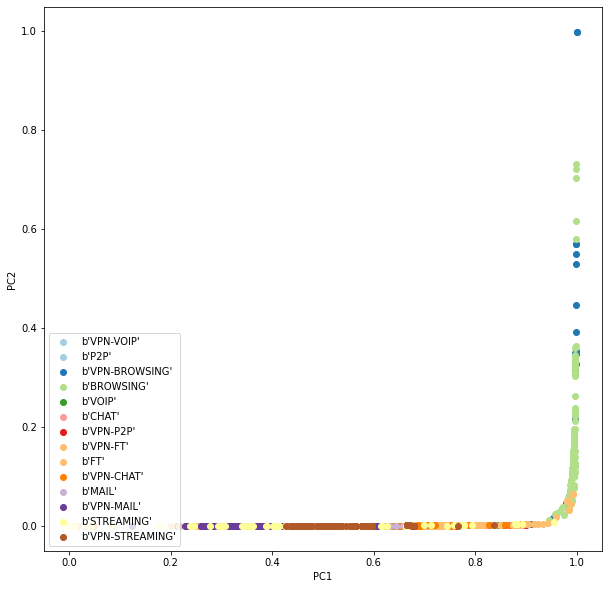

In [20]:
plot_prediction(prediction)

In [21]:
# import plotly.express as px


In [22]:
# df.iloc[:, -1].shape

In [23]:
# prediction.shape

In [24]:
# df_prediction = pd.DataFrame(data = prediction, columns = ['PC'+ str(i + 1) for i in range(prediction.shape[1])])
# df_prediction['value'] = df.iloc[:, -1].values

In [25]:
# fig = px.scatter_3d(df_prediction, x='PC1', y='PC2', z='PC3',
#               color='value')
# fig.show()

In [148]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim), stddev=1)
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [149]:
class Intermediate(layers.Layer):

    def __init__(self, latent_dim=3, name="Intermediate", **kwargs):
        super(Intermediate, self).__init__(name=name, **kwargs)
        self.mean = Dense(latent_dim)
        self.log_var = Dense(latent_dim)
        self.sampling = Sampling()

    def call(self, inputs):
        z_mean = self.mean(inputs)
        z_log_var = self.log_var(inputs)
        z = self.sampling((z_mean, z_log_var))
        return z_mean, z_log_var, z

In [150]:
latent_model = Sequential([
                      Dense(128, input_shape=(X.shape[-1], ), activation='sigmoid'),
                      Dense(64, activation='sigmoid'),
                           ], name = 'latent_model')

In [151]:
latent_dim = 2

In [152]:
def build_encoder(inp):
    x = latent_model(inp)
    z_mean, z_log_var, z = Intermediate(latent_dim=latent_dim)(x)
    model = Model(inp, z, name='Encoder')
    return z_mean, z_log_var, model  

In [153]:
inp= Input(shape= (X.shape[-1], ), name='Input')
z_mean, z_log_var, vae_encoder = build_encoder(inp)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [154]:
vae_encoder.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 23)]              0         
_________________________________________________________________
latent_model (Sequential)    (None, 64)                11328     
_________________________________________________________________
Intermediate (Intermediate)  ((None, 2), (None, 2), (N 260       
Total params: 11,588
Trainable params: 11,588
Non-trainable params: 0
_________________________________________________________________


In [155]:
vae_decoder = Sequential([
                      Dense(64, input_shape=(2, ), activation='sigmoid'),
                    Dense(128, activation='sigmoid'),
                      Dense(X.shape[-1]),
])

In [156]:
vae_autoencoder = Model(inputs = inp, outputs = vae_decoder(vae_encoder(inp)), name = 'AutoEncoder')

In [157]:
vae_autoencoder.summary()

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 23)]              0         
_________________________________________________________________
Encoder (Functional)         (None, 2)                 11588     
_________________________________________________________________
sequential_8 (Sequential)    (None, 23)                11479     
Total params: 23,067
Trainable params: 23,067
Non-trainable params: 0
_________________________________________________________________


In [158]:
def custom_loss(y_true, y_predict):
    mean_loss = K.mean(K.square(y_true-y_predict))

    return mean_loss

In [159]:
kl_loss = -5e-4 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
vae_autoencoder.add_loss(kl_loss, inputs=inp)

In [160]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
vae_autoencoder.compile(optimizer, loss = custom_loss, metrics = ['accuracy'])

In [161]:
vae_autoencoder.fit(X, X, batch_size= 10000, epochs= 200)

Epoch 1/200
2/2 [==============================] - 0s 5ms/step - loss: 1.2587 - accuracy: 2.8212e-04
Epoch 2/200
2/2 [==============================] - 0s 6ms/step - loss: 1.1999 - accuracy: 5.2869e-04
Epoch 3/200
2/2 [==============================] - 0s 5ms/step - loss: 1.1110 - accuracy: 0.0143
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 1.0299 - accuracy: 0.0540
Epoch 5/200
2/2 [==============================] - 0s 5ms/step - loss: 1.0219 - accuracy: 0.0622
Epoch 6/200
2/2 [==============================] - 0s 5ms/step - loss: 1.0453 - accuracy: 0.0224
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 0.9984 - accuracy: 0.0268
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 1.0363 - accuracy: 0.0064
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 0.9653 - accuracy: 0.0013
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 1.0023 - accuracy: 0.0032
Epoch 11/200
2/2 [===

2/2 [==============================] - 0s 5ms/step - loss: 0.7478 - accuracy: 0.0736
Epoch 85/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.0734
Epoch 86/200
2/2 [==============================] - 0s 5ms/step - loss: 0.7014 - accuracy: 0.0775
Epoch 87/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6789 - accuracy: 0.0770
Epoch 88/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6729 - accuracy: 0.0752
Epoch 89/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6854 - accuracy: 0.0749
Epoch 90/200
2/2 [==============================] - 0s 4ms/step - loss: 0.7188 - accuracy: 0.0784
Epoch 91/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6621 - accuracy: 0.0795
Epoch 92/200
2/2 [==============================] - 0s 5ms/step - loss: 0.7065 - accuracy: 0.0790
Epoch 93/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.0787
Epoch 94/200
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.4376 - accuracy: 0.0935
Epoch 167/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4453 - accuracy: 0.0943
Epoch 168/200
2/2 [==============================] - 0s 4ms/step - loss: 0.4674 - accuracy: 0.0939
Epoch 169/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4707 - accuracy: 0.1015
Epoch 170/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4533 - accuracy: 0.0933
Epoch 171/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4586 - accuracy: 0.0862
Epoch 172/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4488 - accuracy: 0.0926
Epoch 173/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4721 - accuracy: 0.1106
Epoch 174/200
2/2 [==============================] - 0s 4ms/step - loss: 0.4301 - accuracy: 0.2008
Epoch 175/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4694 - accuracy: 0.0970
Epoch 176/200
2/2 [=====

In [162]:
vae_prediction = vae_encoder.predict(X)

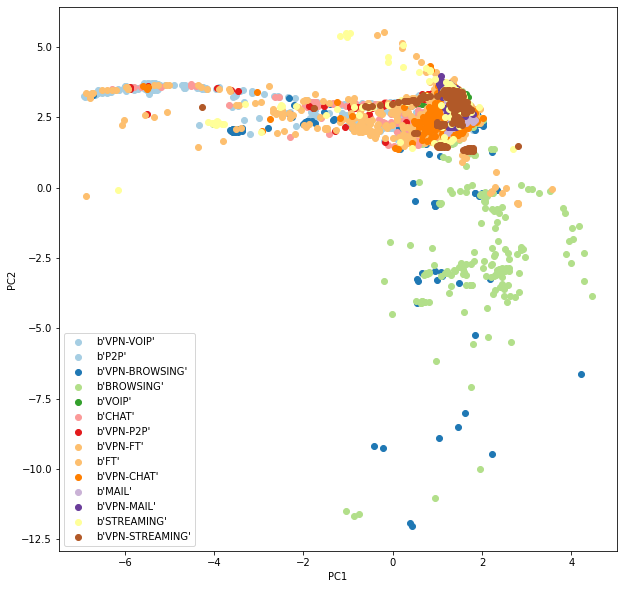

In [163]:
plot_prediction(vae_prediction)